# Análise dos dados
## Carregando dataset
### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.graphics.gofplots import qqplot
import pylab as py
from scipy.stats import norm
import seaborn as sn

In [2]:
!python --version

Python 3.10.7


### Funções para salvar e carregar o dataset

In [3]:
def save_dataset(df, fname):
    df.to_csv(fname, index=False)

def load_dataset(fname):
    d = pd.read_csv(fname)
    d["Número de avaliações"] = d["Número de avaliações"].astype('Int32')
    d["Termômetro"] = d["Termômetro"].astype('Int32')
    return d

### Carregando dataset

In [4]:
df = load_dataset("dataset.csv")
df

,Nome,Preço,Categoria,Avaliação,Número de avaliações,Termômetro,Vendedor
0,Smartphone Samsung Galaxy A14 5g 128gb 4gb Preto,1099.00,Celulares e Smartphones,4.8,205,5,Mercado Livre
1,Moto E40 Dual SIM 64 GB grafite 4 GB RAM,769.00,Celulares e Smartphones,4.6,824,5,123 Comprou
2,Samsung Galaxy S20 FE 5G 5G Dual SIM 128 GB cl...,1869.00,Celulares e Smartphones,4.8,2281,5,Mercado Livre
3,Apple iPhone 11 (128 GB) - Branco,3988.10,Celulares e Smartphones,4.5,2573,5,NILTONDASILVALIPPERTJUNIOR
4,Xiaomi Redmi Note 11 (Snapdragon) Dual SIM 128...,1229.30,Celulares e Smartphones,4.7,4057,5,JEFERSON ELETROSTORE
...,...,...,...,...,...,...,...
8477,Paçoca Quadrada Lual Zero Açúcar Display 432g ...,30.50,Guloseimas,NaN,<NA>,5,4WELL
8478,Óleo Essencial Natural De Cedro Virgínia 10ml Wnf,31.89,Cuidado do Corpo,NaN,<NA>,5,LOJAS THERAPON
8479,Biscoito Maizena Vitarella Tradicional 350g - ...,23.99,Biscoitos,NaN,<NA>,5,DISMAX+DISTRIBUIÇÃO_MÁXIMA
8480,Sabonete Íntimo Diário Instance Eudora - Fruta...,23.44,Sabonetes Íntimos,NaN,<NA>,5,1981_VENDAS


### Tipos dos dados

In [5]:
df.dtypes

Nome                     object
Preço                   float64
Categoria                object
Avaliação               float64
Número de avaliações      Int32
Termômetro                Int32
Vendedor                 object
dtype: object

### Valores nulos em cada coluna

In [6]:
df.isnull().sum()

Nome                       0
Preço                     41
Categoria                  3
Avaliação               5058
Número de avaliações    5058
Termômetro               769
Vendedor                  71
dtype: int64

## Análise Estatística dos dados
### Medidas de tendência central

#### Média

In [7]:
pd.DataFrame(df.mean(numeric_only=True), columns=["Média"]).T

,Preço,Avaliação,Número de avaliações,Termômetro
Média,1184.472321,4.59413,187.997371,4.95916


#### Mediana

In [8]:
pd.DataFrame(df.median(numeric_only=True), columns=["Mediana"]).T

,Preço,Avaliação,Número de avaliações,Termômetro
Mediana,199.0,4.7,16.0,5.0


#### Moda

In [9]:
# Mostra a moda para cada coluna
d = df.mode(numeric_only=True)
d.index = ["Moda"]
d

,Preço,Avaliação,Número de avaliações,Termômetro
Moda,99.9,5.0,1,5


#### Média e mediana por categoria

In [10]:
def mean_by_category(df, column):
    return pd.DataFrame(df.groupby(["Categoria"]).mean(numeric_only=True).sort_values(by=column, ascending=False)[column]).dropna()

def median_by_category(df, column):
    return pd.DataFrame(df.groupby(["Categoria"]).median(numeric_only=True).sort_values(by=column, ascending=False)[column]).dropna()


In [11]:
# Média de preço por categoria
mean_by_category(df, "Preço")

,Preço
Categoria,
Notebooks,6610.577086
Televisores,2705.484259
Caixas de Som,2396.717838
Celulares e Smartphones,2388.102284
Pulverizadores a Combustão,1399.450000
...,...
Espumas de Barbear,10.490000
Pães de Mel,9.090000
Papinhas,7.990000


In [12]:
# Médiana de preço por categoria
median_by_category(df, "Preço")

,Preço
Categoria,
Notebooks,2537.00
Caixas de Som,2049.00
Televisores,1999.00
Celulares e Smartphones,1433.52
Pulverizadores a Combustão,1399.45
...,...
Macarrões,10.17
Pães de Mel,9.09
Papinhas,7.99


### Medidas de dispersão

#### Desvio Absoluto Médio

In [13]:
pd.DataFrame(df.mad(), columns=["Desvio Absoluto Médio"]).T

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_6180\2558835263.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.DataFrame(df.mad(), columns=["Desvio Absoluto Médio"]).T


,Preço,Avaliação,Número de avaliações,Termômetro
Desvio Absoluto Médio,1511.460481,0.31559,270.683026,0.079086


#### Variância

In [14]:
pd.DataFrame(df.var(numeric_only=True), columns=["Variância"]).T

,Preço,Avaliação,Número de avaliações,Termômetro
Variância,1.339675e+07,0.176381,492385.456318,0.059665


#### Desvio Padrão

In [15]:
pd.DataFrame(df.std(numeric_only=True), columns=["Desvio Padrão"]).T

,Preço,Avaliação,Número de avaliações,Termômetro
Desvio Padrão,3660.157109,0.419977,701.701829,0.244264


### Tabelas de Frequências e Histograma

In [16]:
def show_histogram(df, column, k = None, x1 = None, x2 = None, y1 = None, y2 = None):
    # Número de bins
    if k == None:
        k = math.ceil(1 + 3.3 * math.log10( df[column].size ))
    # Mostrar histograma
    plt.hist(df[column].dropna(), bins=int(k))
    plt.title("Histograma", fontweight="bold")
    plt.xlabel(column, fontweight="bold")
    plt.ylabel("Frequência", fontweight="bold")
    plt.axis((x1, x2, y1, y2))
    plt.show()

#### Nome

In [17]:
pd.DataFrame(df[["Nome"]].value_counts(), columns=["Frequência"])

,Frequência
Nome,
"Notebook Acer A315-34-c2bv Celeron N4020 4gb 128gb Ssd 15,6",8
"Notebook Multilaser Ultra Intel Core I3 4gb 1tb 14,1'' Ub421",8
adidas Duramo SL 2.0 Masculino Adultos,6
Almofada De Resfriamento Para Laptop Suporte Para Preto,5
adidas Streetcheck Court Low Masculino Adultos,5
...,...
Gin Tanqueray London Dry 750ml Gim Original + Nf + Ipi,1
Gin Rosé Larios 700ml,1
Gin Rock's Dry 1 L,1


#### Preço

In [18]:
pd.DataFrame(df[["Preço"]].value_counts(), columns=["Frequência"])

,Frequência
Preço,
99.90,18
71.01,16
49.90,16
119.90,15
1399.00,15
...,...
152.90,1
152.88,1
152.15,1


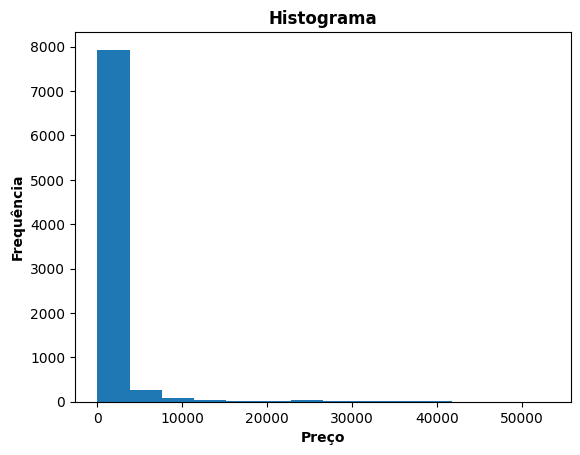

In [19]:
show_histogram(df, "Preço")

Ver apenas produtos que custam menos de 1000 reais

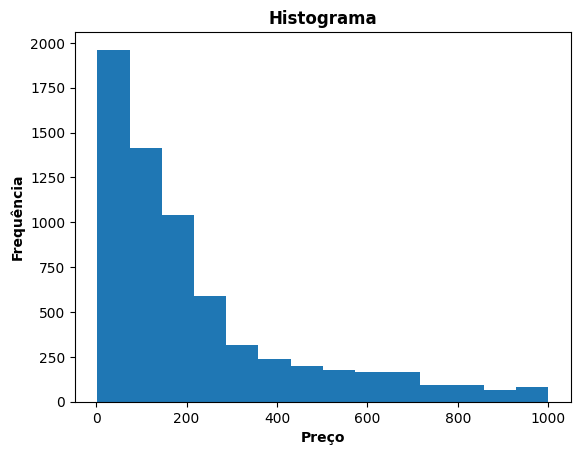

In [20]:
d = df[df["Preço"] < 1000]
show_histogram(d, "Preço")

#### Categoria

In [21]:
pd.DataFrame(df[["Categoria"]].value_counts(), columns=["Frequência"])

,Frequência
Categoria,
Celulares e Smartphones,959
Perfumes,947
Smartwatches,921
Notebooks,779
Tênis,716
...,...
Sacos de Lixo,1
Molhos e Caldas,1
Papinhas,1


#### Avaliação

In [22]:
pd.DataFrame(df[["Avaliação"]].value_counts(), columns=["Frequência"])

,Frequência
Avaliação,
5.0,770
4.8,492
4.7,398
4.6,300
4.9,270
4.5,267
4.4,183
4.0,164
4.3,151


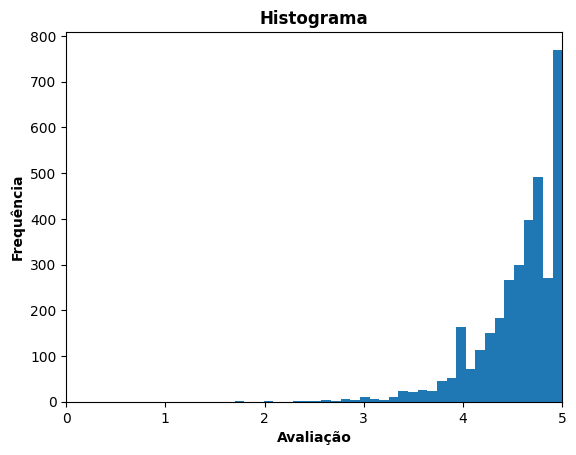

In [23]:
# Todos os valores possíveis para avaliação do mínimo até o máximo
bins = 1 + int(10*(df["Avaliação"].max() - df["Avaliação"].min()))
show_histogram(df, "Avaliação", bins, 0, 5)

#### Número de avaliações

In [24]:
pd.DataFrame(df[["Número de avaliações"]].value_counts(), columns=["Frequência"])

,Frequência
Número de avaliações,
1,289
2,250
3,161
5,154
4,151
...,...
457,1
458,1
464,1


In [25]:
pd.DataFrame(df[["Termômetro"]].value_counts(), columns=["Frequência"])

,Frequência
Termômetro,
5,7468
4,181
3,60
2,3
0,1


### Boxplot

Preço                      AxesSubplot(0.125,0.11;0.352273x0.77)
Número de avaliações    AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

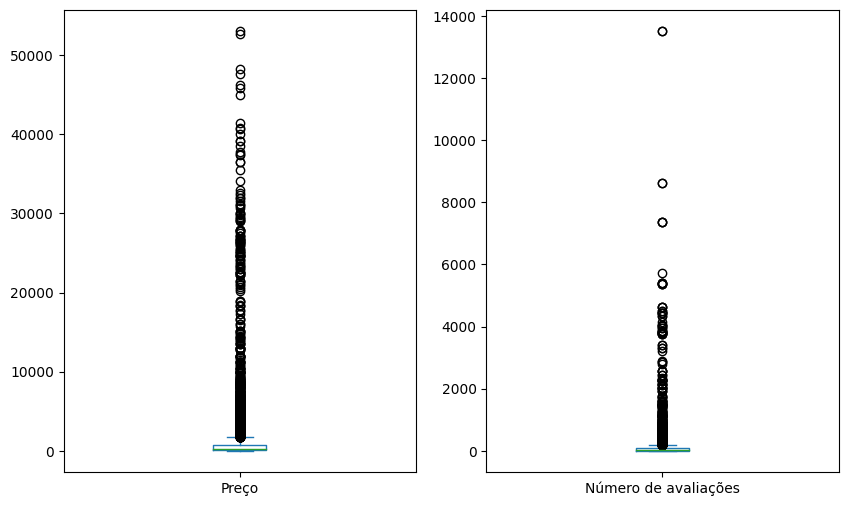

In [26]:
df[["Preço", "Número de avaliações"]].plot(kind='box', figsize=(10, 6), subplots=True)

Removendo outliers do boxplot

Preço                      AxesSubplot(0.125,0.11;0.352273x0.77)
Número de avaliações    AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

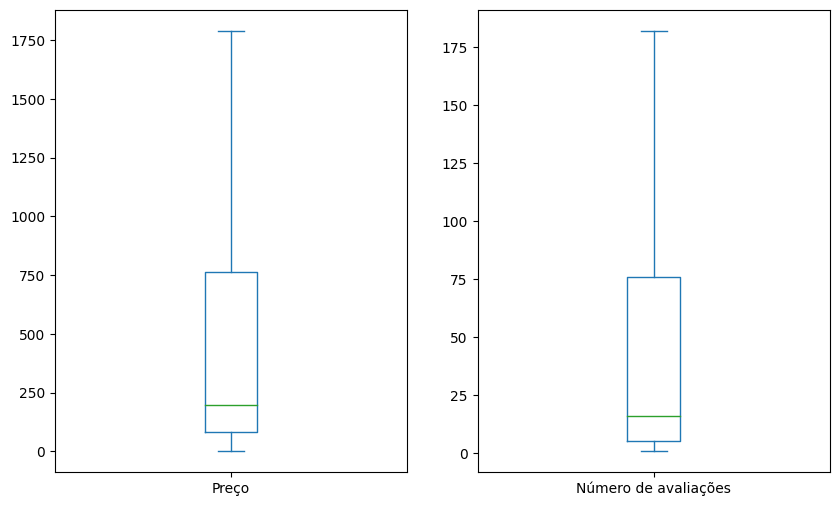

In [27]:
df[["Preço", "Número de avaliações"]].plot(kind='box', figsize=(10, 6), subplots=True, showfliers=False)

### QQ-Plot

In [28]:
df_copy = df.dropna()

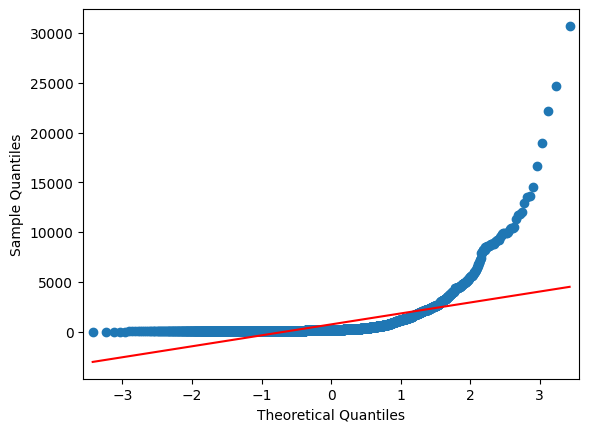

In [29]:
qqplot(df_copy["Preço"], line="r") 
py.show()

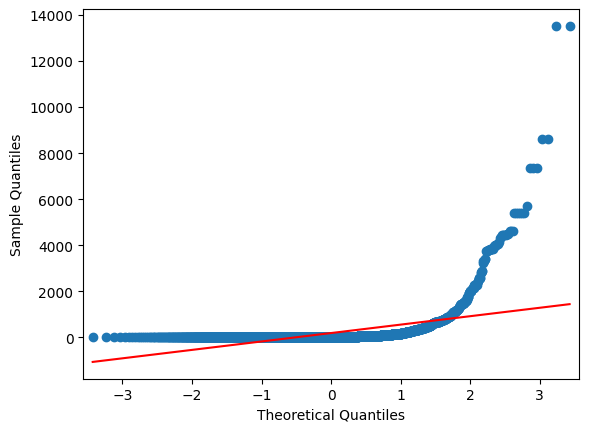

In [30]:
qqplot(df_copy["Número de avaliações"], line="r") 
py.show()

### Correlações

In [31]:
df[["Preço", "Número de avaliações"]].corr()

,Preço,Número de avaliações
Preço,1.000000,0.022921
Número de avaliações,0.022921,1.000000


<AxesSubplot: >

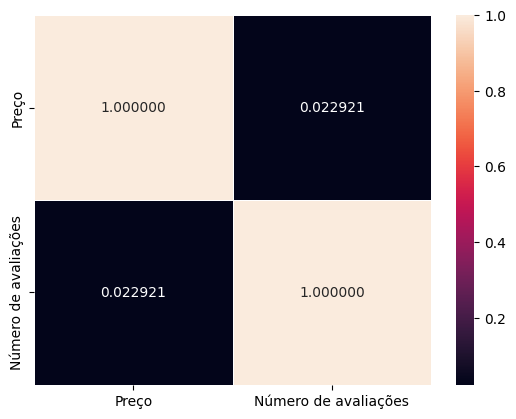

In [32]:
plot = sn.heatmap(df[["Preço", "Número de avaliações"]].corr(), annot = True, fmt="1f", linewidths=.6)
plot

### V de Cramer

#### Selecionamos apenas atributos categóricos

In [33]:
data = df[['Avaliação', 'Categoria', 'Termômetro']].dropna()
data

,Avaliação,Categoria,Termômetro
0,4.8,Celulares e Smartphones,5
1,4.6,Celulares e Smartphones,5
2,4.8,Celulares e Smartphones,5
3,4.5,Celulares e Smartphones,5
4,4.7,Celulares e Smartphones,5
...,...,...,...
8442,4.7,Cuidado do Corpo,5
8456,5.0,Erva-Mate,5
8457,5.0,Creme Dental,5
8460,4.0,Tratamentos com o Cabelo,5


#### Codificação de Labels

In [34]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

data_encoded

,Avaliação,Categoria,Termômetro
0,27,22,3
1,25,22,3
2,27,22,3
3,24,22,3
4,26,22,3
...,...,...,...
3304,26,37,3
3305,29,50,3
3306,29,34,3
3307,19,119,3


#### Construção da função V de Cramer

In [35]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

#### Construção da matriz

In [36]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_result = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df_result

,Avaliação,Categoria,Termômetro
Avaliação,1.00,0.04,0.01
Categoria,0.04,1.00,0.01
Termômetro,0.01,0.01,1.00


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_6180\324872137.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_result, dtype=np.bool)


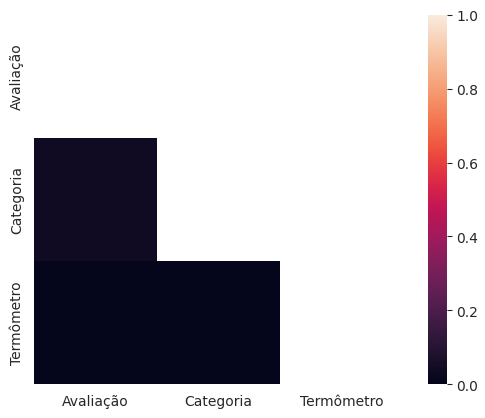

In [47]:
mask = np.zeros_like(df_result, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sn.axes_style("white"):
  ax = sn.heatmap(df_result, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

### Teste de Normalidade

In [38]:
import scipy

In [39]:
df_copy = df.copy()
df_copy["Número de avaliações"] = df_copy["Número de avaliações"].astype('float64')

In [40]:
def check_normality(Data_df):
    
    y_std = scipy.stats.zscore(Data_df.dropna().values)
    y_std = y_std.flatten()
    D, p = scipy.stats.kstest(y_std, 'norm', alternative='greater')
    if D < p:
        print('Os dados seguem uma distribuição normal.')
    else:
        print('Os dados não seguem uma distribuição normal.')

In [41]:
check_normality(pd.DataFrame(df_copy["Preço"]))

Os dados não seguem uma distribuição normal.


In [42]:
check_normality(pd.DataFrame(df_copy["Número de avaliações"]))

Os dados não seguem uma distribuição normal.


### Best Fit Distribution

In [43]:
def check_distribution(dist_names, df):
    y_std = scipy.stats.zscore(df.dropna().values)
    y_std = y_std.flatten()
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [44]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

Verificando para o preço

In [45]:
check_distribution(dist_names, df_copy["Preço"])

c:\Users\Guilherme\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\Guilherme\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
3       lognorm  0.069497   6.804124e-36  no
5      pearson3  0.180958  2.459923e-242  no
0          beta  0.182435  2.500171e-246  no
2         gamma  0.183267  1.351666e-248  no
1         expon  0.380315   0.000000e+00  no
4          norm  0.302117   0.000000e+00  no
6             t  0.262608   0.000000e+00  no
7        triang  0.797979   0.000000e+00  no
8       uniform  0.869359   0.000000e+00  no
9   weibull_min  0.330185   0.000000e+00  no
10  weibull_max  0.277405   0.000000e+00  no


Verificando para o número de avaliações

In [46]:
check_distribution(dist_names, df_copy["Número de avaliações"])

c:\Users\Guilherme\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\Guilherme\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
3       lognorm  0.075746   1.566336e-17  no
5      pearson3  0.219363  3.657606e-145  no
9   weibull_min  0.236113  2.109153e-168  no
0          beta  0.274480  1.823964e-228  no
1         expon  0.462190   0.000000e+00  no
2         gamma  0.580711   0.000000e+00  no
4          norm  0.354961   0.000000e+00  no
6             t  0.336572   0.000000e+00  no
7        triang  0.851112   0.000000e+00  no
8       uniform  0.892931   0.000000e+00  no
10  weibull_max  0.860124   0.000000e+00  no
